**Principal Component Analysis PCA o Análisis de Componentes Principales ACP**

Principal Component Analysis es una técnica de Extracción de Características donde combinamos las entradas de una manera específica y podemos eliminar algunas de las variables “menos importantes” manteniendo la parte más importante todas las variables. Como valor añadido, luego de aplicar PCA conseguiremos que todas las nuevas variables sean independientes una de otra.

Tomado de: https://www.aprendemachinelearning.com/comprende-principal-component-analysis/ 

In [ ]:
!pip install bioinfokit # Se debe instalar ese paquete o libreria debido a que sera necesaria para llevará acabo el código de bioinfokit.visuz. 

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from bioinfokit.visuz import cluster
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

In [9]:
from google.colab import files 
uploaded= files.upload () 

Saving dataset.csv to dataset (1).csv


In [12]:
data=pd.read_csv("dataset.csv",delimiter=";",skiprows=[0]) # Leo la base de datos y ademas quito la primera fila de mi base de datos debido a que esta no es de utilidad.
data # Leo la base de datos y la muestro.

,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,A1,600,1,1,4,6,2,10,0,...,0,0,1,0,0,0,0,0,0,0
1,2,A1,700,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
2,3,A1,200,1,5,1,10,6,10,3,...,1,0,1,0,1,1,0,0,1,0
3,4,A1,300,1,5,0,6,10,2,3,...,0,0,1,0,0,1,0,0,0,0
4,5,A1,600,2,1,4,10,2,6,0,...,5,0,1,0,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,S52,2300,1,12,3,2,2,1,0,...,1,0,1,0,1,0,0,0,0,0
185,186,S52,300,1,14,2,7,10,2,0,...,5,0,1,1,1,1,1,0,1,0
186,187,S52,500,1,1,4,1,10,2,0,...,5,0,1,1,1,1,1,0,1,0
187,188,S52,300,1,12,3,2,1,6,0,...,0,0,1,0,1,1,0,0,0,0


In [19]:
data=pd.get_dummies(data) # Para categorizar las variables cualitativas.
data

,ID,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,...,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt,Motorway_A1,Motorway_S52
0,1,600,1,1,4,6,2,10,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,700,1,5,1,10,6,10,3,1,...,1,0,1,1,0,0,1,0,1,0
2,3,200,1,5,1,10,6,10,3,4,...,1,0,1,1,0,0,1,0,1,0
3,4,300,1,5,0,6,10,2,3,4,...,1,0,0,1,0,0,0,0,1,0
4,5,600,2,1,4,10,2,6,0,0,...,1,0,1,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,185,2300,1,12,3,2,2,1,0,0,...,1,0,1,0,0,0,0,0,0,1
185,186,300,1,14,2,7,10,2,0,0,...,1,1,1,1,1,0,1,0,0,1
186,187,500,1,1,4,1,10,2,0,0,...,1,1,1,1,1,0,1,0,0,1
187,188,300,1,12,3,2,1,6,0,0,...,1,0,1,1,0,0,0,0,0,1


In [59]:
# Elimino columnas de la data original
data1=data.drop(columns=["ID","Motorway_A1","Motorway_S52","Green frogs","Brown frogs","Common toad","Fire-bellied toad","Tree frog","Common newt","Great crested newt"])
data1

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
0,600,1,1,4,6,2,10,0,0,50,0,0,0,1
1,700,1,5,1,10,6,10,3,1,75,1,1,0,1
2,200,1,5,1,10,6,10,3,4,75,1,1,0,1
3,300,1,5,0,6,10,2,3,4,25,0,0,0,1
4,600,2,1,4,10,2,6,0,0,99,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2300,1,12,3,2,2,1,0,0,75,2,1,0,1
185,300,1,14,2,7,10,2,0,0,100,5,5,0,1
186,500,1,1,4,1,10,2,0,0,100,5,5,0,1
187,300,1,12,3,2,1,6,0,0,100,1,0,0,1


In [44]:
# Elimino columnas de la data original
data1=data.drop(columns=["ID",])
data2=data1.drop(columns=["Motorway_A1"])
data3=data2.drop(columns=["Motorway_S52"])
data4=data3.drop(columns=["Green frogs"])
data5=data4.drop(columns=["Brown frogs"])
data6=data5.drop(columns=["Common toad"])
data7=data6.drop(columns=["Fire-bellied toad"])
data8=data7.drop(columns=["Tree frog"])
data9=data8.drop(columns=["Common newt"])
data10=data9.drop(columns=["Great crested newt"])
data10 # Data resultante despues de eliminar columnas no deseadas

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
0,600,1,1,4,6,2,10,0,0,50,0,0,0,1
1,700,1,5,1,10,6,10,3,1,75,1,1,0,1
2,200,1,5,1,10,6,10,3,4,75,1,1,0,1
3,300,1,5,0,6,10,2,3,4,25,0,0,0,1
4,600,2,1,4,10,2,6,0,0,99,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,2300,1,12,3,2,2,1,0,0,75,2,1,0,1
185,300,1,14,2,7,10,2,0,0,100,5,5,0,1
186,500,1,1,4,1,10,2,0,0,100,5,5,0,1
187,300,1,12,3,2,1,6,0,0,100,1,0,0,1


In [60]:
data1.describe().T # Estadística descriptiva de la base de datos nueva.

,count,mean,std,min,25%,50%,75%,max
SR,189.0,9633.227513,46256.078309,30.0,300.0,700.0,3300.0,500000.0
NR,189.0,1.566138,1.544419,1.0,1.0,1.0,1.0,12.0
TR,189.0,4.952381,5.590918,1.0,1.0,1.0,12.0,15.0
VR,189.0,1.904762,1.317407,0.0,1.0,2.0,3.0,4.0
SUR1,189.0,4.232804,3.434615,1.0,2.0,2.0,7.0,14.0
SUR2,189.0,5.391534,3.515185,1.0,2.0,6.0,9.0,11.0
SUR3,189.0,5.841270,3.293480,1.0,2.0,6.0,9.0,11.0
UR,189.0,0.841270,1.315291,0.0,0.0,0.0,3.0,3.0
FR,189.0,0.846561,1.349843,0.0,0.0,0.0,2.0,4.0
OR,189.0,89.962963,19.904926,25.0,99.0,100.0,100.0,100.0


In [61]:
# Este es un paso opcional
# StandardScaler permite estándarizar los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1. 
df_st =  StandardScaler().fit_transform(data1)  
pd.DataFrame(df_st, columns=data1.columns).head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR
0,-0.195806,-0.367544,-0.708806,1.594650,0.515892,-0.967387,1.266070,-0.641306,-0.628821,-2.013025,-0.928337,-0.950140,-0.160817,-0.127
1,-0.193638,-0.367544,0.008540,-0.688599,1.683599,0.173556,1.266070,1.645616,0.113974,-0.753718,-0.530478,-0.570486,-0.160817,-0.127
2,-0.204477,-0.367544,0.008540,-0.688599,1.683599,0.173556,1.266070,1.645616,2.342358,-0.753718,-0.530478,-0.570486,-0.160817,-0.127
3,-0.202309,-0.367544,0.008540,-1.449681,0.515892,1.314499,-1.169423,1.645616,2.342358,-3.272331,-0.928337,-0.950140,-0.160817,-0.127
4,-0.195806,0.281669,-0.708806,1.594650,1.683599,-0.967387,0.048323,-0.641306,-0.628821,0.455216,-0.928337,0.948131,-0.160817,-0.127


# **Estandarización**



**Realice PCA usando scikit-learn**

Scikit-learn, nos permite hacer:

Obtener los autovectores y autovalores de la matriz de covarianza.

Ordenar los autovalores de mayor a menor y elegir los “k” autovectores que se correspondan con los autovectores “k” más grandes (donde “k” es el número de dimensiones del nuevo subespacio de características).

Construir la matriz de proyección W con los “k” autovectores seleccionados.

Transformamos el dataset original “X estandarizado” vía W para obtener las nuevas características k-dimensionales.


In [66]:
pca_out = PCA(n_components=7).fit(df_st) # De las 14 variables solo voy a tomar 7 componentes
# Obtener la varianza del componente
# Proporción de varianza (de PC1 a PC7)
pca_out.explained_variance_ratio_ # Razon de varianzas explicadas que importancia tiene cada variable en el modelo. 

array([0.2363907 , 0.13125779, 0.11009079, 0.0863381 , 0.07455018,
       0.07053077, 0.06121311])

In [67]:
# Proporción acumulada de varianza (de PC1 a PC7)  
np.cumsum(pca_out.explained_variance_ratio_) # Me permite saber el porcentaje de importancia que presentan mis variables.

array([0.2363907 , 0.36764849, 0.47773928, 0.56407738, 0.63862756,
       0.70915833, 0.77037144])

In [70]:
# Cargas o pesos de los componentes (coeficiente de correlación entre las variables originales y el componente) 
# Cargas de componentes representa los elementos del vector propio
# Las cargas al cuadrado dentro de las PC siempre suman 1
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['Variable'] = data1.columns.values
loadings_df = loadings_df.set_index('Variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Variable,,,,,,,
SR,0.211692,0.417123,0.385776,0.200085,0.161976,-0.068878,0.066841
NR,0.275880,0.406356,0.304850,0.088790,0.213014,-0.097707,0.004189
TR,-0.294539,-0.016048,0.032185,0.028315,-0.271406,0.072914,0.637049
VR,-0.332720,0.061674,0.377423,-0.021632,0.251355,-0.006849,-0.405421
SUR1,0.117531,-0.039677,0.451372,0.105891,-0.375407,0.283043,0.158105
SUR2,0.099008,0.030148,-0.256693,-0.534157,0.457764,0.043244,0.110399
SUR3,0.082439,-0.178430,-0.240433,0.437823,-0.245548,-0.268737,-0.443911
UR,0.436082,0.195924,-0.247147,-0.009271,-0.165226,0.100559,0.040717
FR,0.440583,0.235670,-0.252645,0.042064,-0.106375,0.067005,0.016454


El primer componente principal tiene fuertes cargas de BR (Desarrollo de edificios - Distancia mínima a los edificios) y RR (Distancia mínima del depósito de agua a las carreteras). 

El cuarto componente principal tiene fuertes cargas de SUR2 que representa el segundo tipo mas dominante de cobertura terrestre que rodea el depósito de agua.

El quinto componente principal tiene fuertes cargas negativas de SUR1 Entorno 1: los tipos dominantes de cobertura terrestre que rodean el depósito de aguay cargas positivas de SUR2.


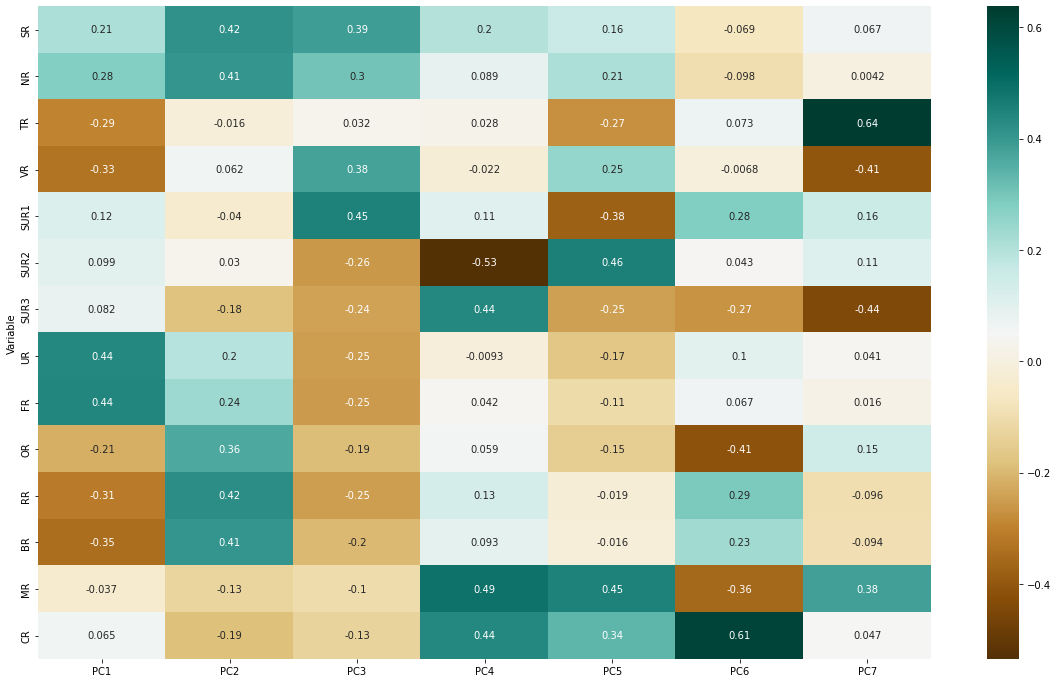

In [75]:
# Obtener gráfico de matriz de correlación para cargas
plt.figure(figsize=(20,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='BrBG')
plt.show()

La anterior matriz de correlación nos permite observar y evaluar el grado de relación lineal entre cada par de variables, los cuales se ubican entre -0.4 y 0.6, de esta forma evidenciamos que el valor de correlación entre el componente principal PC7 y la variable TR (Tipo de depósitos de agua) es el más alto y positivo (0.64); además el componente principal PC4 y la variable SUR2 (Entorno 2: el segundo tipo más dominante de cobertura terrestre que rodea el depósito de agua) correlacionan altamente y de manera negativa (-0.53), lo anterior indica que estos se encargan de explicar o medir las mismas características.

In [76]:
loadings_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], dtype='object')

In [77]:
abs(loadings_df["PC1"]).mean()

0.23301103970095943

In [78]:
pca_out.explained_variance_ratio_, pca_out.explained_variance_ratio_[:4].sum()

(array([0.2363907 , 0.13125779, 0.11009079, 0.0863381 , 0.07455018,
        0.07053077, 0.06121311]), 0.564077380579712)

# **Retención de los componentes principales (PC)**

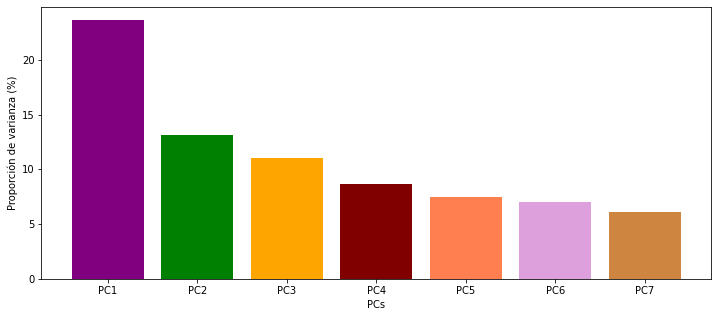

In [155]:
# En este grafico se evidencia el porcentaje explicación de cada componente.
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,pca_out.explained_variance_ratio_*100,color=("purple","green","orange","maroon","coral","plum","peru" ))
plt.ylabel("Proporción de varianza (%)")
plt.xlabel("PCs")
plt.show()

El primer componente principal explica el 23,63% de la variación total del conjunto de datos.

El segundo componente principal explica el 13,12% de la variación total.

El tercer componente principal explica el 11% de la variación total.

El cuarto componente principal explica el 8,63% de la variación total.

El quinto componente principal explica el 7,45% de la variación total.

El sexto componente principal explica el 7% de la variación total.

El septimo componente principal explica el 6,12% de la variación total.

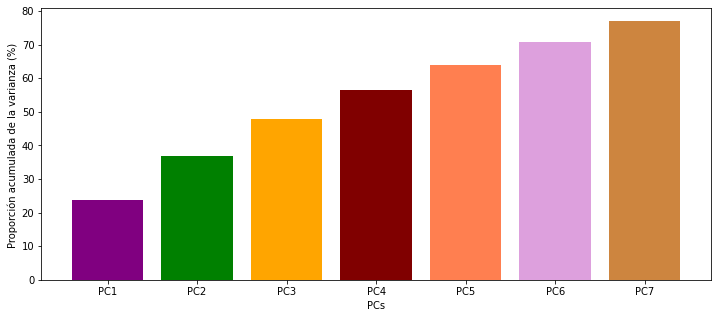

In [156]:
# En este grafico se evidencia el porcentaje acumulado de explicación de cada componente.
plt.figure(figsize=(12,5))
plt.bar(loadings_df.columns,np.cumsum(pca_out.explained_variance_ratio_*100),color=("purple","green","orange","maroon","coral","plum","peru" ))
plt.ylabel( "Proporción acumulada de la varianza (%) ")
plt.xlabel("PCs")
plt.show()

La proporción acumulada de las componentes es de aproximadamente 77%, la utilidad de esta proporción radica en evaluar la cantidad total de varianza que explican los componentes principales consecutivos; ademas puede ayudar a determinar el número de componentes principales que se usará.


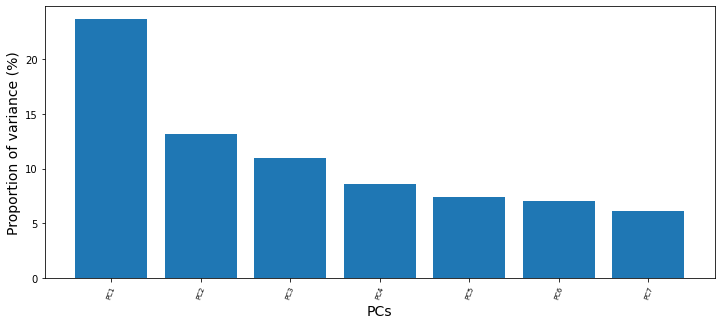

In [157]:
# Obtener valores propios (varianza explicada por cada PC)
pca_out.explained_variance_
# Obtener parcela de pedregal (para prueba de pedregal o codo)
cluster.screeplot(obj=[loadings_df.columns,pca_out.explained_variance_ratio_],show=True,dim=(12,5),axlabelfontsize=14,)
plt.show()
# La gráfica scree se guardará en el mismo directorio con el nombre screeplot.png

In [126]:
data["Green frogs"].value_counts() # Variable objeto de estudio Ranas verdes.

1    108
0     81
Name: Green frogs, dtype: int64

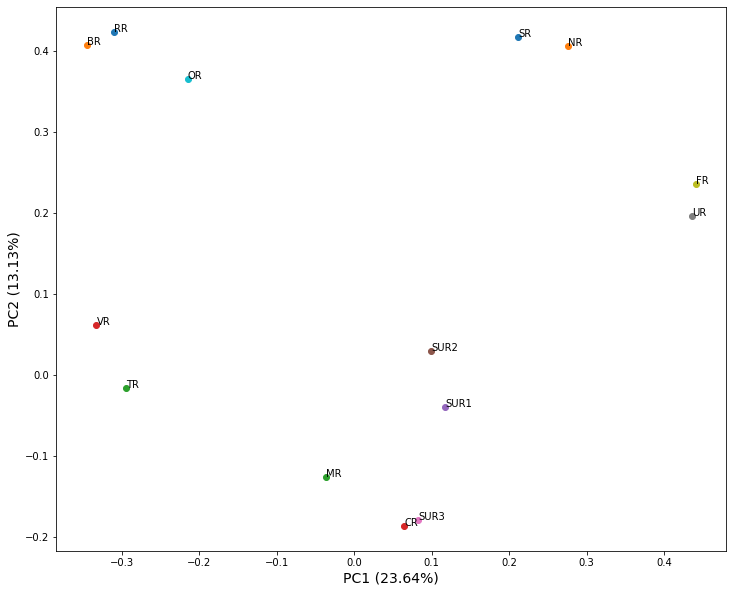

In [125]:
# Obtener gráficos de carga PCA (2D y 3D)
# 2D
cluster.pcaplot(x=loadings[0], y=loadings[1], labels=data1.columns.values,
                show=True,dim=(12,10),axlabelfontsize=14,
    var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

A través del grafico bivariado en 2D de la primera componente versus segunda componente principal, se evidencia de manera visual que las variables con más cargas dentro de estas componentes son las relacionadas con porcentaje de acceso desde los bordes del embalse a áreas no desarrolladas (OR), Distancia mínima del depósito de agua a las carreteras (RR), Urbanización - Distancia mínima a los edificios (BR), los valores más atípicos son Tipo de orilla (CR) y Entorno 3: el tercer tipo más dominante de cobertura terrestre que rodea el depósito de agua (SUR3).  

In [152]:
# Permite transformar la varible explicativa cualitativa o cuantitativa que este dentro de rangos determinados. 
cmap=plt.cm.cool
norm=plt.Normalize(vmin=0,vmax=1)

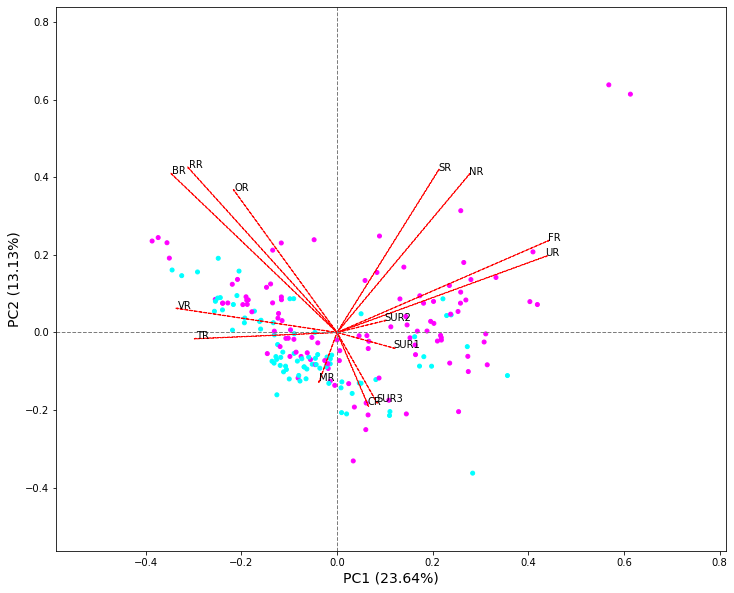

In [154]:
# Obtener puntajes de PC
pca_scores = PCA().fit_transform(df_st)

# Obtener biplot 2D
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data1.columns.values,dotsize=16,
               colordot=cmap(norm(data["Green frogs"])),arrowcolor='r',arrowlinewidth=0.9,arrowlinestyle='--',show=True,dim=(12,10),axlabelfontsize=14,
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

Se evidencia que la urbanización, distancia mínima del deposito de agua y los bordes del embalse a áreas no desarrolladas ósea que el primer componente principal esta estrechamente relacionado o mide de manera negativa en su mayoría las características del ambiente, y el componente dos mide tales variables pero de manera positiva. 
Asimismo, se observa que el uso de depósitos de agua, la presencia de la pesca, superficie del deposito de agua numérico y el segundo tipo mas dominante de cobertura terrestre que rodea el depósito de agua, son variables que influyen de manera mayoritaria en la presencia de ranas verdes.  

In [164]:
X = data[["SR", "NR", "TR", "VR", "SUR1", "SUR2", "SUR3","UR","FR","OR","RR","BR","MR","CR"]]
Y = data["Green frogs"]
X= sm.add_constant(X)
model = sm.OLS(Y,X).fit()
pred=round(model.predict(X))
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Green frogs   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     5.445
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.34e-08
Time:                        20:27:17   Log-Likelihood:                -100.89
No. Observations:                 189   AIC:                             231.8
Df Residuals:                     174   BIC:                             280.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8173      0.379      2.154      0.033       0.069       1.566
SR         -1.823e-07   9.18e-07     -0.199      0.843   -1.99e-06    1.63e-06
NR             0.0380      0.028      1.340      0.182      -0.018       0.094
TR            -0.0316      0.006     -4.878      0.000      -0.044      -0.019
VR            -0.0070      0.031     -0.223      0.824      -0.069       0.055
SUR1           0.0083      0.010      0.842      0.401      -0.011       0.028
SUR2           0.0059      0.009      0.626      0.532      -0.013       0.025
SUR3          -0.0294      0.010     -2.954      0.004      -0.049      -0.010
UR             0.0759      0.047      1.623      0.106      -0.016       0.168
FR            -0.0017      0.047     -0.036      0.971      -0.095       0.091
OR             0.0006      0.002      0.342      0.732      -0.003       0.004
RR             0.0354      0.021      1.674      0.096      -0.006       0.077
BR             0.0013      0.020      0.064      0.949      -0.039       0.042
MR             0.1916      0.109      1.762      0.080      -0.023       0.406
CR            -0.2386      0.264     -0.904      0.367      -0.759       0.282
==============================================================================
Omnibus:                       20.288   Durbin-Watson:                   1.483
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.907
Skew:                          -0.241   Prob(JB):                       0.0192
Kurtosis:                       2.121   Cond. No.                     6.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El R-squared o R cuadrado no es el apropiado o no es el más factible estadísticamente para mis datos, es decir que el modelo no predice bien la presencia o ausencia de ranas verdes en los lugares en estudio. 

Text(0.5, 0, 'ORIGINAL')

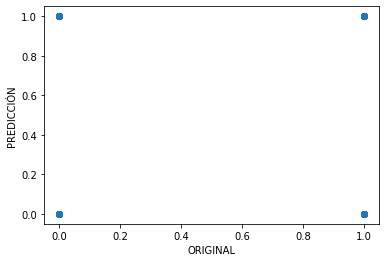

In [161]:
plt.scatter(Y,pred)
plt.ylabel("PREDICCIÓN")
plt.xlabel("ORIGINAL")

In [162]:
confusion_matrix(Y,pred)/189*100

array([[29.1005291 , 13.75661376],
       [10.58201058, 46.56084656]])

Teniendo en cuenta la matriz de confusión se logra evidenciar que el modelo tendría un 75,66% de factibilidad para los datos, es decir que la mayor parte de veces se predice de manera correcta la ausencia o presencia de ranas verdes. 